# Extended Figure 7

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import sys
from tqdm import tqdm
from matplotlib.lines import Line2D
import matplotlib.cm as cm

tqdm.pandas()

sys.path.append('../..') 
sys.path.append('../../main/Fig1') 
from consensus_variables import * 

In [3]:
# plt.rcParams['legend.handlelength'] = 1
# plt.rcParams['legend.handleheight'] = 1.125

In [4]:
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58"]

## Fig 7a: error injection results ilustration: RBM10 BotSeq

In [5]:
nmuts_ordered_genes = [
  # "TERTpromoter",
 # 'PIK3CA',
 'FGFR3',
 'TP53',
 'RB1',
 'KMT2C',
 'CDKN1A',
 'FOXQ1',
 'NOTCH2',
 'STAG2',
 'CREBBP',
 'EP300',
 'RBM10',
 'ARID1A',
 'KDM6A',
 'KMT2D',
 'ALL_GENES']
impacts = ["truncating", "missense"]
omegas = ["1", "2", "5", "10", "50"]
error_rates = ["0","1e-09","5e-09","1e-08","3e-08","5e-08","7e-08","9e-08","1e-07"]

In [6]:
omega_palette = {"1": "#B8E4EC",
                "2": "#9AB8F5",
                "5": "#80A9FF",
                "10": "#0078BD",
                "50": "#00315C"}
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58", "BOTSEQ_ARTIFACT"]

In [7]:
cmap = cm.get_cmap("coolwarm")
norm = np.linspace(0.2, 0.8, len(error_rates))  # Avoid very dark colors

# Create dictionary with colors
errorrate_palette = {key: cmap(n) for key, n in zip(error_rates, norm)}
errorrate_palette

/tmp/ipykernel_2080278/1453847428.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("coolwarm")


{'0': (np.float64(0.48385432959999997),
  np.float64(0.6220498496),
  np.float64(0.9748082026),
  np.float64(1.0)),
 '1e-09': (np.float64(0.5869210038431373),
  np.float64(0.7181213123921568),
  np.float64(0.9988741138823529),
  np.float64(1.0)),
 '5e-09': (np.float64(0.6881884831921569),
  np.float64(0.7931783792980391),
  np.float64(0.9880381043568628),
  np.float64(1.0)),
 '1e-08': (np.float64(0.7820491171058823),
  np.float64(0.8428642126588235),
  np.float64(0.9429798432705883),
  np.float64(1.0)),
 '3e-08': (np.float64(0.8674276350862745),
  np.float64(0.864376599772549),
  np.float64(0.8626024620196079),
  np.float64(1.0)),
 '5e-08': (np.float64(0.933221183),
  np.float64(0.8155568504470588),
  np.float64(0.7531514321411764),
  np.float64(1.0)),
 '7e-08': (np.float64(0.9658988981882353),
  np.float64(0.7401418386039216),
  np.float64(0.6370577074156862),
  np.float64(1.0)),
 '9e-08': (np.float64(0.9649113881372549),
  np.float64(0.6401590780588234),
  np.float64(0.51980559870588

In [8]:
# load results for all_samples
samples = ["all_samples"]
artifacts = ["SBS43", "SBS45", "SBS52", "SBS58", "BOTSEQ_ARTIFACT"]

In [9]:
omega_synsamples_res_df = pd.read_table(f"{deepcsa_run_dir}/error_injection/full_table.tsv.gz")

/tmp/ipykernel_2080278/2844512474.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
/tmp/ipykernel_2080278/2844512474.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
/tmp/ipykernel_2080278/2844512474.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
/tmp/ipykernel_2080278/2844512474.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
/tmp/ipy

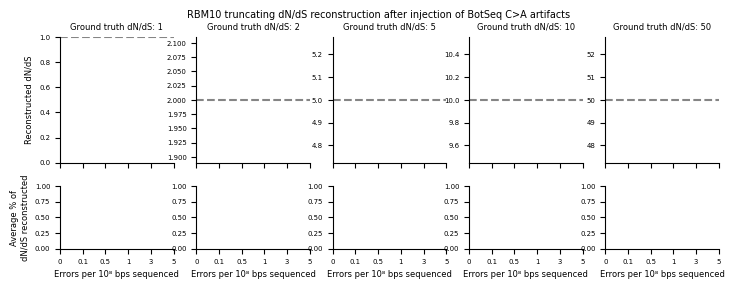

In [10]:
gene_expl = "RBM10"
impact_expl = "truncating"
artifact_expl = "BOTSEQ_ARTIFACT"
artifact_title = "BotSeq C>A"

fig, axs = plt.subplots(2, len(omegas), figsize = (8.5, 2.746), sharex = True,  gridspec_kw={"height_ratios": [2, 1]})
fig.suptitle(f"{gene_expl} truncating dN/dS reconstruction after injection of {artifact_title} artifacts",
fontsize = plots_general_config["title_fontsize"])

plot_df = omega_synsamples_res_df.loc[(omega_synsamples_res_df["gene"] == gene_expl) &
                                    (omega_synsamples_res_df["impact"] == impact_expl) &
                                    (omega_synsamples_res_df["artifact"] == artifact_expl)]

# top plots
i = 0
for j, w in enumerate(omegas):
    sns.boxplot(plot_df.loc[plot_df["groundtruth_omega"] == w],
                x = "errorate", y = "dnds",
                order = error_rates, 
                palette = errorrate_palette, ax = axs[i,j],
                showfliers = False, linewidth = 0.5)
    axs[i,j].axhline(y = int(w), color = "#858585", linestyle = "--")

    axs[i,j].set_xlabel("")
    axs[i,j].set_ylabel("")
    axs[i,j].set_title(f"Ground truth dN/dS: {w}", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
                            fontsize = plots_general_config["xyticks_fontsize"])
    if j == 0:
        axs[i,j].set_ylabel("Reconstructed dN/dS", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i,j].tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
    axs[i,j].spines["top"].set_visible(False)
    axs[i,j].spines["right"].set_visible(False)

# bottom plots
i += 1
for j, w in enumerate(omegas):
    sns.barplot(plot_df.loc[plot_df["groundtruth_omega"] == w].groupby(
        "errorate")["prop_reconstructed_dnds"].median().to_frame("median_prop_reconstructed_dnds").reset_index(),
                x = "errorate", y = "median_prop_reconstructed_dnds",
                order = error_rates, 
                palette = errorrate_palette, ax = axs[i,j]
                )

    axs[i,j].set_xlabel("Errors per 10⁸ bps sequenced", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i,j].set_ylabel("")
    axs[i,j].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
                            fontsize = plots_general_config["xyticks_fontsize"])
    if j == 0:
        axs[i,j].set_ylabel("Average % of\ndN/dS reconstructed", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i,j].tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
    axs[i,j].spines["top"].set_visible(False)
    axs[i,j].spines["right"].set_visible(False)

    for p in axs[i,j].patches:
        height = p.get_height()
        axs[i,j].text(p.get_x() + p.get_width() / 2, height, f"{height:.0f}", 
                ha="center", va="bottom", fontsize = plots_general_config["annots_fontsize"])

# plt.tight_layout()
plt.subplots_adjust(hspace=0.25)
plt.savefig(f"figs/extFig7a.pdf", dpi = 300, bbox_inches = 'tight')
plt.show()

## Fig 7b: error injection results

In [11]:
artifacts_palette = sns.color_palette("pastel", len(artifacts))
artifacts_palette = dict(zip(artifacts, artifacts_palette))
artifacts_palette

{'SBS43': (0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 'SBS45': (1.0, 0.7058823529411765, 0.5098039215686274),
 'SBS52': (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 'SBS58': (1.0, 0.6235294117647059, 0.6078431372549019),
 'BOTSEQ_ARTIFACT': (0.8156862745098039, 0.7333333333333333, 1.0)}

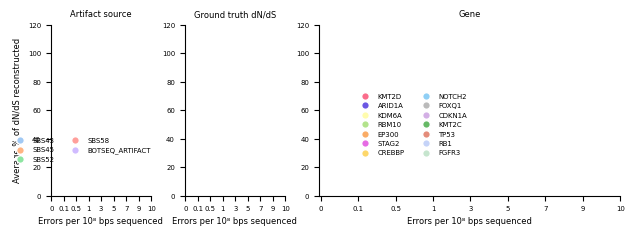

In [ ]:
excluded_genes = ["TERTpromoter", "PIK3CA", "ALL_GENES"]
plot_df = omega_synsamples_res_df.loc[~(omega_synsamples_res_df["gene"].isin(excluded_genes))]

variables2plot = ["artifact", "groundtruth_omega", "gene"]
variables2plot_order = [artifacts, omegas, nmuts_ordered_genes]
variables2plot_colors = [artifacts_palette, omega_palette, gene2color]
variable2plot_title = ["Artifact source", "Ground truth dN/dS", "Gene"]
fig, axs = plt.subplots(1, len(variables2plot), figsize = (7.350, 2.217), sharey = False,
                       gridspec_kw = {'width_ratios': [1, 1, 3]})

for i, (var, order, palette, title) in enumerate(zip(variables2plot, variables2plot_order, variables2plot_colors, variable2plot_title)):

    plot_df_gpby = plot_df.groupby(
        ["errorate", var])["prop_reconstructed_dnds"].median().to_frame("median_prop_reconstructed_dnds").reset_index()
    plot_df_gpby["errorate"] = pd.Categorical(plot_df_gpby["errorate"], categories = error_rates, ordered = True)
    
    sns.lineplot(plot_df_gpby,
                x = "errorate", y = "median_prop_reconstructed_dnds", hue = var, 
                hue_order = order, marker = "o",
                palette = palette, ax = axs[i],
                markersize = 3, linewidth = .5, markeredgewidth = 0.1
                )
    
    axs[i].set_xlabel("Errors per 10⁸ bps sequenced", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i].set_ylabel("")
    axs[i].set_title(title, fontsize = plots_general_config["xylabel_fontsize"])
    axs[i].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    axs[i].set_xticklabels(["0", "0.1", "0.5", "1", "3", "5", "7", "9", "10"],
                        fontsize = plots_general_config["xyticks_fontsize"])
    axs[i].tick_params(axis='y', labelsize = plots_general_config["xyticks_fontsize"])
                        
    axs[i].set_ylim(0, 120)  # Set y-axis limits
    if i == 0:
        axs[i].set_ylabel("Average % of dN/dS reconstructed", fontsize = plots_general_config["xylabel_fontsize"])
    axs[i].legend_.remove()
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)

    legend_handles = []
    for categ in palette:
        if categ in plot_df_gpby[var].unique():
            legend_handles.append(Line2D([0], [0], marker='o', color='w', 
                                        markerfacecolor=palette[categ], markersize=5.5, label=categ))

    if var == "artifact":
        legend_pos = (0.27, 0.4)
    elif var == "groundtruth_omega":
        legend_pos = (0.4, 0.4)
    elif var == "gene":
        legend_pos = (0.7, 0.6)
    legend = fig.legend(handles=legend_handles, title="", loc='upper right', bbox_to_anchor=legend_pos, 
                        fontsize=plots_general_config["legend_fontsize"],
                        title_fontsize = plots_general_config["legend_fontsize"], ncols = 2, 
                        frameon = False, alignment = "center")
    legend.get_title().set_ha('center')  

plt.tight_layout()
plt.savefig(f"figs/extFig7b.pdf", dpi = 300, bbox_inches = 'tight')